In [35]:
import pandas as pd
import numpy as np
import pickle
import tqdm
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

from wordcloud import WordCloud

import matplotlib.pyplot as plt
# %matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv('datasets/stopword/data_sastrawi.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,id,url,title,text,text_clean,text_stemmed,text_stemmed_stop
0,663265,https://id.wikipedia.org/wiki/Ramban%20Timur%2...,"Ramban Timur, Cermee, Bondowoso",Ramban Timur merupakan salah satu desa di Keca...,ramban timur merupakan salah satu desa di keca...,ramban timur rupa salah satu desa di camat cer...,ramban timur salah desa camat cermee kabupaten...
1,3405898,https://id.wikipedia.org/wiki/Punggok%20kokodok,Punggok kokodok,"Punggok kokodok (Ninox boobook), dikenal di be...",punggok kokodok ninox boobook dikenal di beber...,punggok kokodok ninox boobook kenal di beberap...,punggok kokodok ninox boobook daerah mopoke sp...
2,1210013,https://id.wikipedia.org/wiki/2012%20CA53,2012 CA53,2012 CA53 adalah sebuah asteroid. Asteroid ini...,2012 ca53 adalah sebuah asteroid asteroid ini ...,2012 ca53 adalah buah asteroid asteroid ini ru...,2012 ca53 asteroid asteroid asteroid amor leta...
3,3344775,https://id.wikipedia.org/wiki/Marc%20Esposito,Marc Esposito,Marc Esposito () adalah seorang sutradara dan ...,marc esposito adalah seorang sutradara dan pen...,marc esposito adalah orang sutradara dan tulis...,marc esposito sutradara tulis naskah prancis e...
4,232236,https://id.wikipedia.org/wiki/Massimo%20Troisi,Massimo Troisi,Massimo Troisi (19 Februari 1953-4 Juni 1994) ...,massimo troisi 19 februari 1953 hingga 4 juni ...,massimo troisi 19 februari 1953 hingga 4 juni ...,massimo troisi 19 februari 1953 4 juni 1994 ak...


In [3]:
corpus = df['text_stemmed_stop']
print(corpus.shape)

(5000,)


## Vectorize

In [14]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = vectorizer.fit_transform(corpus)

In [15]:
print(X.shape)

(5000, 1168283)


In [16]:
with open('exported_model/vectorizer/sastrawi_ngram.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

## Decomposition

In [36]:
pca = TruncatedSVD(100)
X_pca = pca.fit_transform(X)

In [37]:
X_pca.shape

(5000, 100)

## Building Model

### Optimal K-Value

In [38]:
silhouette_avg = []
time_list = []
inertia = []
k_values = range(2, 31)

for num_clusters in tqdm.tqdm(k_values) :
    start_time = time.time()
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    end_time = time.time()
    
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    time_list.append(end_time - start_time)
    inertia.append(kmeans.inertia_)

100%|██████████| 29/29 [56:57<00:00, 117.86s/it]


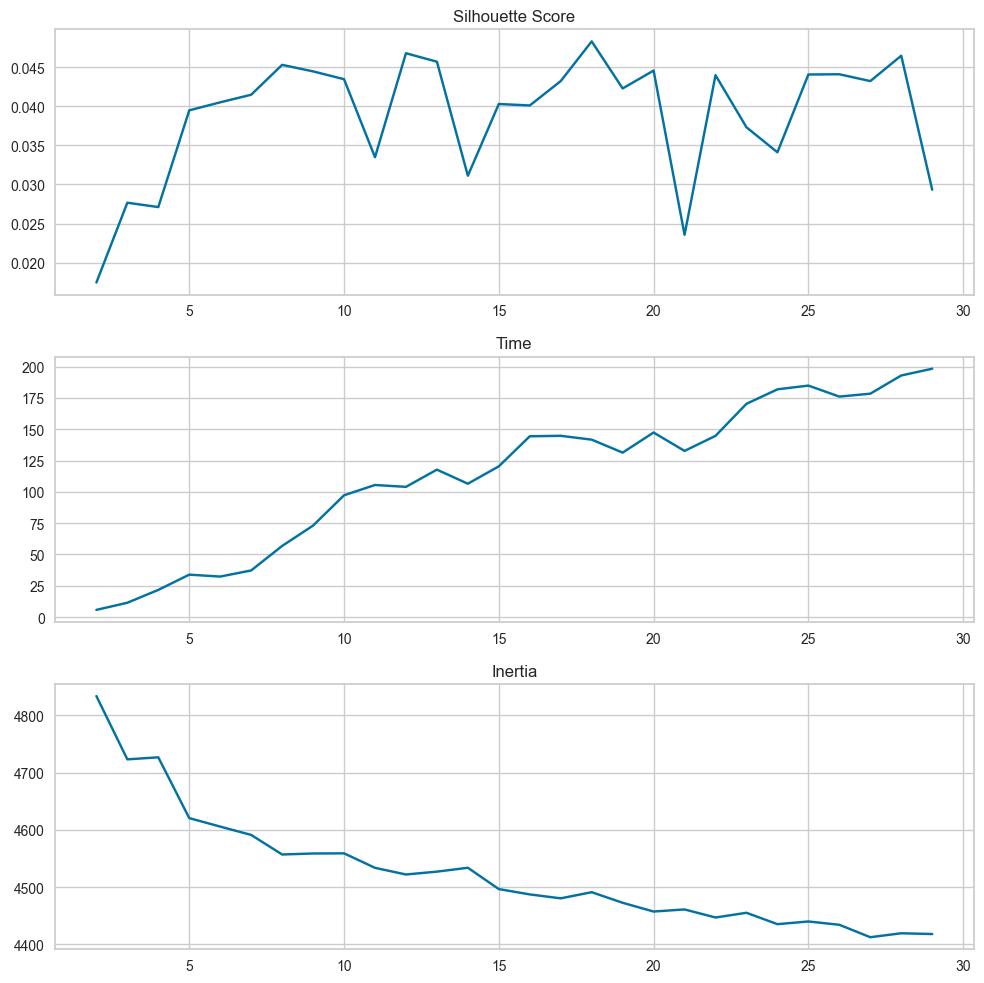

In [42]:
figure, axis = plt.subplots(3, 1, figsize=(10,10))
a, b = 0, -1

axis[0].plot(k_values[a:b], silhouette_avg[a:b])
# axis[0].xlabel('Values of K') 
# axis[0].ylabel('Silhouette Score') 
axis[0].set_title('Silhouette Score')

axis[1].plot(k_values[a:b], time_list[a:b])
# axis[1].xlabel('Values of K') 
# axis[1].ylabel('Time') 
axis[1].set_title('Time')

axis[2].plot(k_values[a:b], inertia[a:b])
# axis[1].xlabel('Values of K') 
# axis[1].ylabel('Time') 
axis[2].set_title('Inertia')

figure.tight_layout()
plt.show()

In [17]:
print(f'Best Silhouette Score at {max(silhouette_avg)} with k-value {silhouette_avg.index(max(silhouette_avg))} for {time_list[silhouette_avg.index(max(silhouette_avg))]} s train time')

Best Silhouette Score at 0.06675625510851588 with k-value 94 for 62.63115954399109 s train time
